In [1]:
import numpy as np

# import models
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# import dataset packages
from sklearn.datasets import make_classification

# import from project files
from utils import plot_2d, test_model

# Logistic Regression vs LDA # 

### Logistic Regression outperforming LDA ###

LDA makes assumptions about the distribution of the data. It has to be a Gaussian distribution and all classes need to share a covariance matrix. Dataset-LR was constructed to fulfill neither of those assumptions. The data points are randomly located with values of x1 and x2 between 0 and 10. The two classes can be perfectly separated by a linear decision boundary and there are no outliers. These characteristics are what LogReg assumes. Therefore, LogReg is able to closely approximate this line, while LDA, due to the unfulfilled assumptions, struggles to find an optimal approximation. 

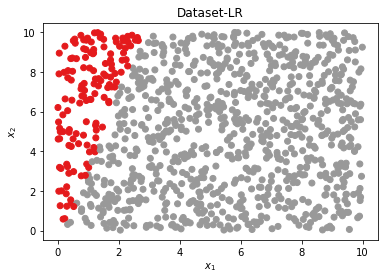

In [2]:
# Generate dataset
def data_lr():

    def classify(x, y):
        func = 4 * x - 1
        return int(func / y > 1) # 1 or 0 as label

    X = np.random.rand(1000, 2) * 10
    y = np.asarray([classify(x, y) for x, y in X])

    return X, y

lr_X, lr_y = data_lr()
plot_2d(lr_X, lr_y, 'Dataset-LR')

LogReg Performance on Dataset-LR:
Mean AUC score: 0.992


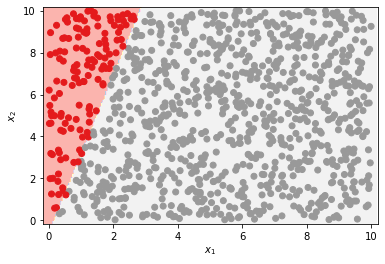

LDA Performance on Dataset-LR:
Mean AUC score: 0.918


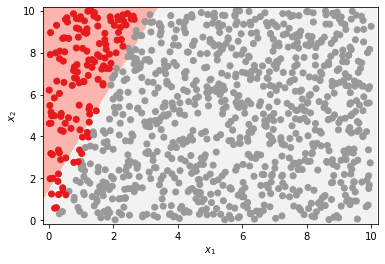

In [3]:
print('LogReg Performance on Dataset-LR:')
logreg = LogisticRegression()
test_model(logreg, lr_X, lr_y)

print('LDA Performance on Dataset-LR:')
lda = LDA()
test_model(lda, lr_X, lr_y)

#### LDA outperforming Logistic Regression ####

Dataset-LDA consists of two normally distributed classes, each with one cluster. The classes are very unbalanced in a ratio of 9:1 with only a few samples. There is added noise as well as overlap between the two clusters. This is a difficult classification problem, due to outliers, overlap, imbalance and the small dataset. But LDA is able to perform well, because the assumption about the data distribution is met, while Logistic Regression struggles to correctly place the decision boundary. It places the boundary too far into the cluster of the smaller class, therefore mislabeling data points of that set. 

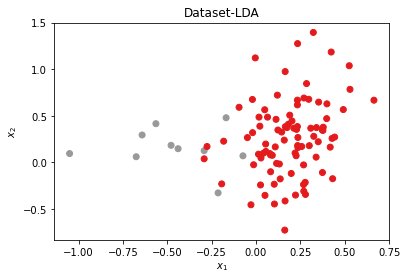

In [4]:
# Generate dataset
def data_lda():
    
    X, y = make_classification(
        n_samples=100,
        n_features=2, 
        n_redundant=0, 
        n_informative=2, 
        class_sep=0.2,
        flip_y=0.01, 
        n_clusters_per_class=1,
        weights=[0.9, 0.1],
        random_state=1,
        )
                    
    return X, y

lda_X, lda_y = data_lda()
plot_2d(lda_X, lda_y, 'Dataset-LDA')

LogReg Performance on Dataset-LDA:
Mean AUC score: 0.512


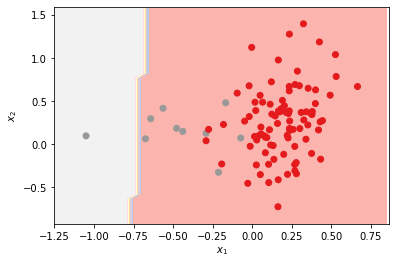

LDA Performance on Dataset-LDA:
Mean AUC score: 0.840


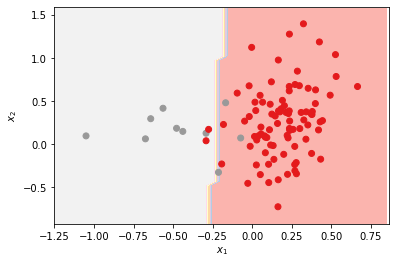

In [5]:
print('LogReg Performance on Dataset-LDA:')
logreg = LogisticRegression()
test_model(logreg, lda_X, lda_y)

print('LDA Performance on Dataset-LDA:')
lda = LDA()
test_model(lda, lda_X, lda_y) 
